## Mount the Google Drive to Google Colab

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Change directory to data set folder

In [2]:
cd gdrive/My\ Drive/Machine\ Learning/Assign\ 4

/content/gdrive/My Drive/Machine Learning/Assign 4


Download the data sets, only need to do once


In [0]:
# !wget --no-check-certificate "http://ufldl.stanford.edu/housenumbers/train_32x32.mat" -O "train_32x32.mat"
# !wget --no-check-certificate "http://ufldl.stanford.edu/housenumbers/test_32x32.mat" -O "test_32x32.mat"

## Load & visulize the data

In [0]:
from scipy.io import loadmat

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

# train and test are python dictionaries
# keys are ['__header__', '__version__', '__globals__', 'X', 'y']

X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

# X and y are numpy ndarrays

Get to know the dimensions of ndarrays

In [5]:
print("Shape of X_train is:", X_train.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (32, 32, 3, 73257)
Shape of y_train is: (73257, 1)
Shape of X_test is: (32, 32, 3, 26032)
Shape of y_test is: (26032, 1)


Since we now know the structure of the data, we can  visulize our training images

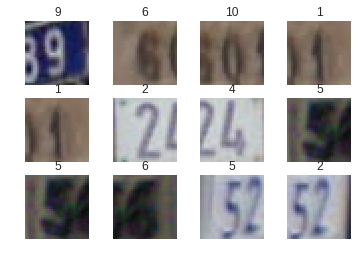

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

X_train = X_train[:,:,:,:]
X_test = X_test[:,:,:,:]

start = 50

fig, ax = plt.subplots(3, 4)
for row in range(3):
    for col in range(4):
        ax[row, col].imshow(X_train[:,:,:,start+row*3+col])
        ax[row, col].axis('off')
        ax[row, col].set_title('{}'.format(y_train[start+row*3+col, 0]))
plt.show()

## Data preprocessing

Since TensorFlow requires the input shape to be (image_num, height, width, channel), we need to reshape our input data. 

In [7]:
import numpy as np

X_train = np.rollaxis(X_train, 3)
X_test = np.rollaxis(X_test, 3)

print("Shape of X_train is now:", X_train.shape)
print("Shape of X_test is now:", X_test.shape)

Shape of X_train is now: (73257, 32, 32, 3)
Shape of X_test is now: (26032, 32, 32, 3)


We also need to reduce the dimension of our output array to one.

In [8]:
y_train = y_train[:,0]
y_test = y_test[:,0]

print("Shape of y_train is now:", y_train.shape)
print("Shape of y_test is now:", y_test.shape)

Shape of y_train is now: (73257,)
Shape of y_test is now: (26032,)


From the plot we know our data labels digit '0' to '10', we need to change it to '0'.

In [9]:
y_train[y_train==10] = 0
y_test[y_test==10] = 0

print("labels of y_train are", np.unique(y_train[:]))
print("labels of y_test are", np.unique(y_test[:]))

labels of y_train are [0 1 2 3 4 5 6 7 8 9]
labels of y_test are [0 1 2 3 4 5 6 7 8 9]


Also we noticed that some images contain mutiple digits, however the label only indicates the middle number. Thus we can crop the images to eliminate unnecessary information.

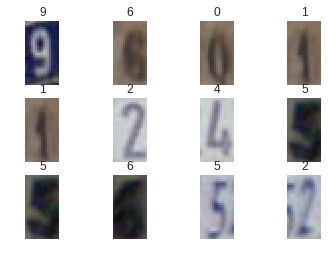

In [10]:
X_train = X_train[:,:,7:24,:]
X_test = X_test[:,:,7:24,:]

# plot cropped images
fig, ax = plt.subplots(3, 4)
for row in range(3):
    for col in range(4):
        ax[row, col].imshow(X_train[start+row*3+col,:,:,:])
        ax[row, col].axis('off')
        ax[row, col].set_title('{}'.format(y_train[start+row*3+col]))
plt.show()

Finally we nomarlize our input data into range (0, 1)

In [0]:
X_train = X_train / 255
X_test = X_test / 255

## Build the model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 17, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# get a summary of our built model
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 13, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 6, 32)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 6, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 4, 64)         18496     
_________________________________________________________________
conv2d_3 (Conv2D)    

## Configure training parameters

In [0]:
# define the optimizer, loss function and metrics for the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [14]:
# start training
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
73257/73257 [==============================] - 23s 318us/sample - loss: 0.9156 - acc: 0.7035
Epoch 2/10
73257/73257 [==============================] - 22s 302us/sample - loss: 0.5169 - acc: 0.8406
Epoch 3/10
73257/73257 [==============================] - 22s 303us/sample - loss: 0.4546 - acc: 0.8622
Epoch 4/10
73257/73257 [==============================] - 22s 302us/sample - loss: 0.4217 - acc: 0.8705
Epoch 5/10
73257/73257 [==============================] - 22s 303us/sample - loss: 0.3976 - acc: 0.8790
Epoch 6/10
73257/73257 [==============================] - 22s 298us/sample - loss: 0.3878 - acc: 0.8815
Epoch 7/10
73257/73257 [==============================] - 22s 299us/sample - loss: 0.3761 - acc: 0.8858
Epoch 8/10
73257/73257 [==============================] - 22s 298us/sample - loss: 0.3653 - acc: 0.8892
Epoch 9/10
73257/73257 [==============================] - 22s 300us/sample - loss: 0.3585 - acc: 0.8917
Epoch 10/10
73257/73257 [==============================] - 22s 2

## Model evaluation

In [15]:
loss, acc = model.evaluate(X_test, y_test)
print("Model accuracy on test data is: {:6.3f}%".format(100 * acc))

26032/26032 [==============================] - 3s 122us/sample - loss: 0.2997 - acc: 0.9151
Model accuracy on test data is: 91.514%


## Save the model

In [0]:
model.save('my_model.h5')